### Lead Scoring Case Study

In [473]:
#import libraries

import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [474]:
#read the dataset

leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [475]:
leads.shape 

(9240, 37)

In [476]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [477]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [478]:
sum(leads.duplicated(subset='Prospect ID'))

0

Input dataset contains 9240 rows and 37 features and there are no duplicates in the dataset.

Moreover, it also shows that `Prospect ID` feature is unique for each row, hence they can be dropped

In [479]:
leads.Converted.value_counts(normalize=True)

0    0.61461
1    0.38539
Name: Converted, dtype: float64

From the dataset, we can see that conversion rate is almost 39%

In [480]:
#Before checking null values, lets replace `Select` with NaN

leads = leads.replace('Select', np.nan)

round(100*leads.isnull().sum()/leads.shape[0],2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

From the above results, we can see that below columns contain more than 45% missing values, hence we can drop them
- How did you hear about X Education
- Lead Quality
- Asymmetrique Activity Index
- Asymmetrique Profile Index
- Asymmetrique Activity Score
- Asymmetrique Profile Score
- Lead Profile

In [481]:
leads.drop(['Lead Profile','Prospect ID','How did you hear about X Education','Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1,inplace=True)
leads.head(3)

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened


In [482]:
#checking missing values again
round(100*leads.isnull().sum()/leads.shape[0],2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [483]:
#Analysing Lead Origin feature

leads['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

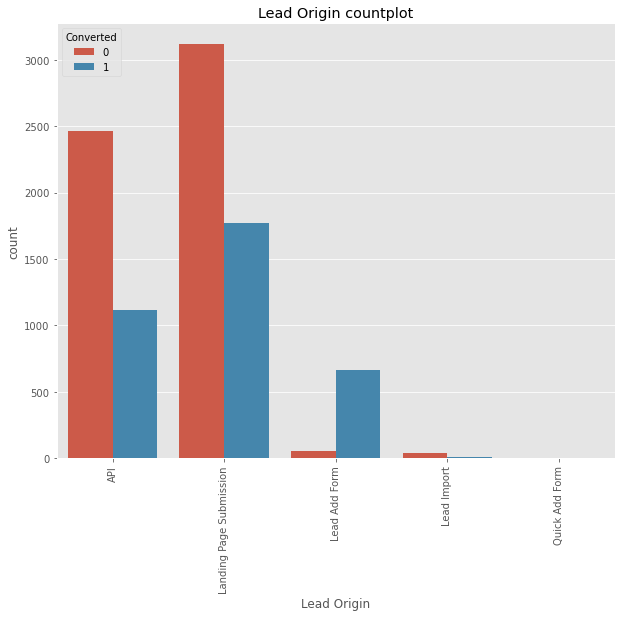

In [484]:
plt.figure(figsize=(10,8))
sns.countplot(leads['Lead Origin'], hue=leads['Converted'])
plt.xticks(rotation=90)
plt.title('Lead Origin countplot')
plt.show()

From the above graph, we can see that
- Lead import and Quick Add Form brought very few leads
- API and Landing Page Submission brought more number of leads and conversions are also more. However, conversions for these two Lead Origin can be improved
- Lead Add Form has very high conversion rate but count of leads is less. More leads should be obtained through Lead Add Form to get more conversion rate.

In [485]:
#Analysing Lead Source feature

leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [486]:
#combining missing values and low frequency values into others category
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')
leads['Lead Source'] = leads['Lead Source'].replace('Social Media', 'Facebook')
leads['Lead Source'] = leads['Lead Source'].replace(np.nan,'Others')
leads['Lead Source'] = leads['Lead Source'].replace(['bing', 'Click2call','Press_Release', 'Live Chat', 'youtubechannel', 'testone', 'Pay per Click Ads', 'welearnblog_Home', 'WeLearn', 'blog', 'NC_EDM'], 'Others')

leads['Lead Source'].value_counts(dropna=False)

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              57
Others                57
Name: Lead Source, dtype: int64

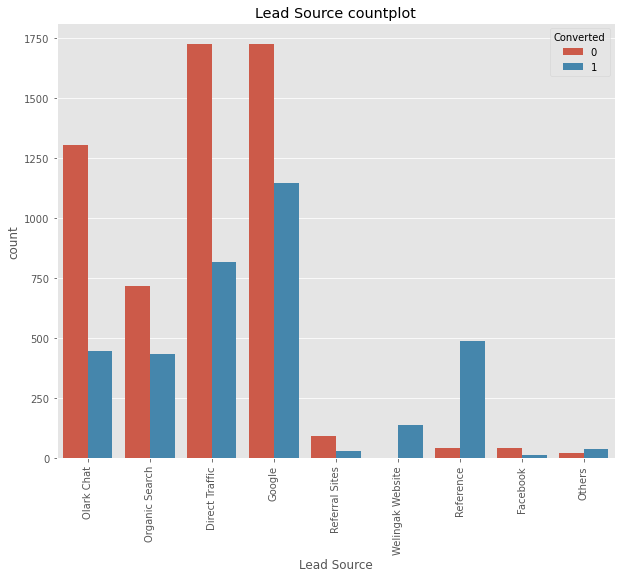

In [487]:
plt.figure(figsize=(10,8))
sns.countplot(leads['Lead Source'], hue=leads['Converted'])
plt.xticks(rotation=90)
plt.title('Lead Source countplot')
plt.show()

From the above graph, we can see that
- Conversion rate is higher for Reference and Welingak Website
- High number of leads received through Direct Traffic, Google and Olark Chat
- Focus should be on getting more leads through Reference and Welingak Website, and improving conversion rate for Direct Traffic, Google, Organic Search and Olark Chat

In [488]:
#lets analyse `Do Not Email` and 'Do Not Call' features
leads['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

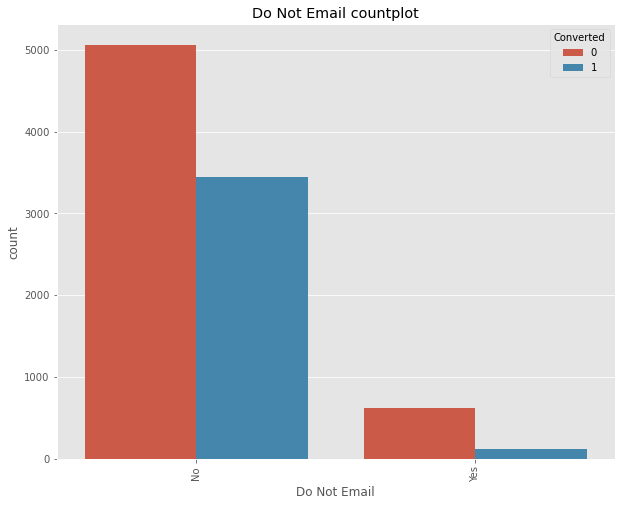

In [489]:
plt.figure(figsize=(10,8))
sns.countplot(leads['Do Not Email'], hue=leads['Converted'])
plt.xticks(rotation=90)
plt.title('Do Not Email countplot')
plt.show()

In [490]:
leads['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

`Do Not Call` feature contains only 2 Yes's, hence we can delete this column

In [491]:
leads.drop('Do Not Call', 1, inplace=True)
leads.head(2)

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,Ringing,No,No,NaN,No,No,Email Opened


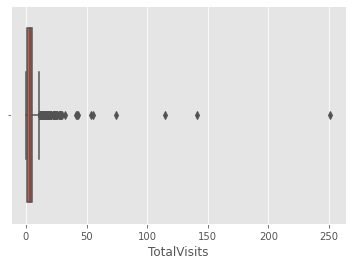

In [492]:
#lets analyze TotalVisits numerical column

sns.boxplot(leads['TotalVisits'])
plt.show()

In [493]:
#From the above graph, we can see that there are outliers in TotalVisits column. Lets try to analyse quantiles
leads['TotalVisits'].quantile([0, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 1])

0.00      0.0
0.25      1.0
0.50      3.0
0.75      5.0
0.90      7.0
0.95     10.0
0.99     17.0
1.00    251.0
Name: TotalVisits, dtype: float64

In [494]:
leads[leads['TotalVisits'] > leads['TotalVisits'].quantile(0.99)].shape

(83, 28)

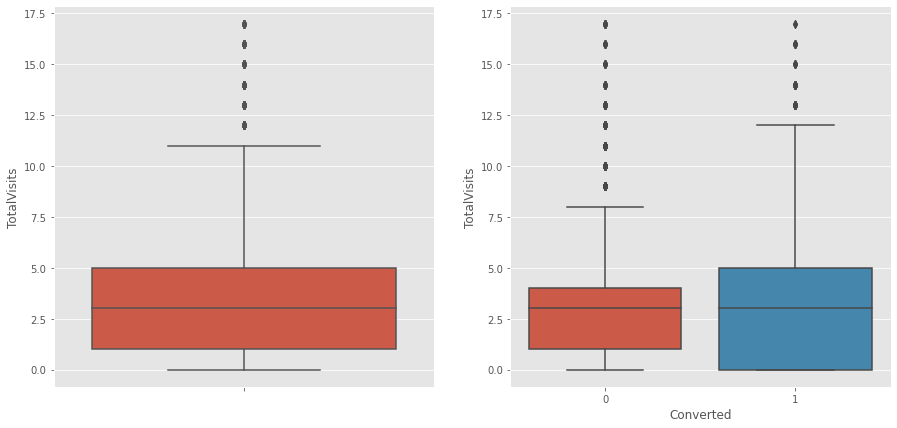

In [495]:
#As there are only 83 rows(1% rows) having higher values in TotalVisits column and will remove them as part of outlier treatment
leads = leads[leads['TotalVisits'] <= leads['TotalVisits'].quantile(0.99)]

plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.boxplot(y=leads['TotalVisits'])

plt.subplot(1,2,2)
sns.boxplot(data=leads, x='Converted', y='TotalVisits')

plt.show()

From the above graph, we can see that median of TotalVisits is same for both converted and non-converted leads

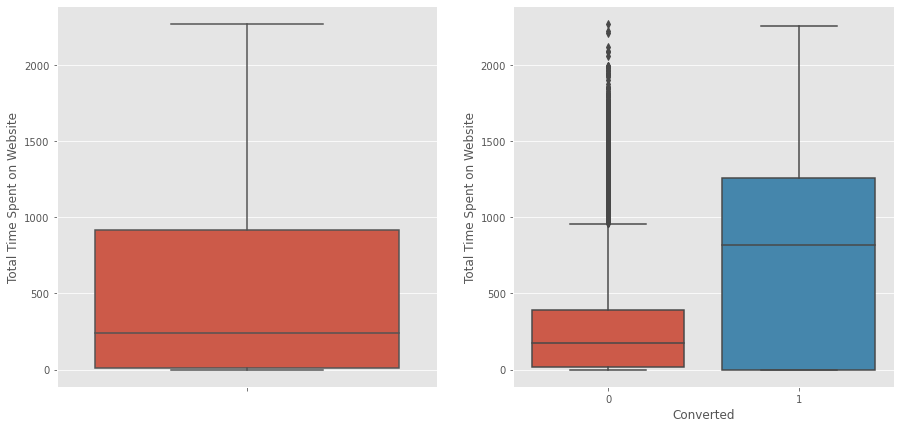

In [496]:
#lets analyse 'Total Time Spent on Website' numerical column

plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.boxplot(y=leads['Total Time Spent on Website'])

plt.subplot(1,2,2)
sns.boxplot(data=leads, x= 'Converted' , y='Total Time Spent on Website')
plt.show()

From the above graph, we can see that there are no potential outliers in `Total Time Spent on Website` column, hence we will not apply outlier treatment to it. Moreover, `Total Time Spent on Website` is more for the converted leads

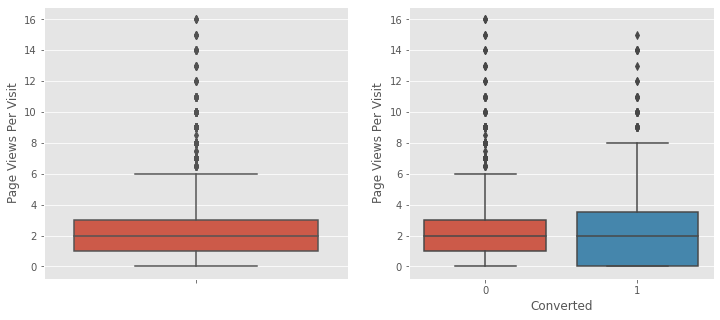

In [497]:
#lets analyse 'Page Views Per Visit' column
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(y=leads['Page Views Per Visit'])

plt.subplot(1,2,2)
sns.boxplot(data=leads, x='Converted', y='Page Views Per Visit')

plt.show()

In [498]:
leads['Page Views Per Visit'].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 1])

0.25     1.0
0.50     2.0
0.75     3.0
0.90     5.0
0.95     6.0
0.99     9.0
1.00    16.0
Name: Page Views Per Visit, dtype: float64

In [499]:
#outlier treatment on 'Page Views Per Visit' column
leads = leads[leads['Page Views Per Visit'] <= leads['Page Views Per Visit'].quantile(0.99)]

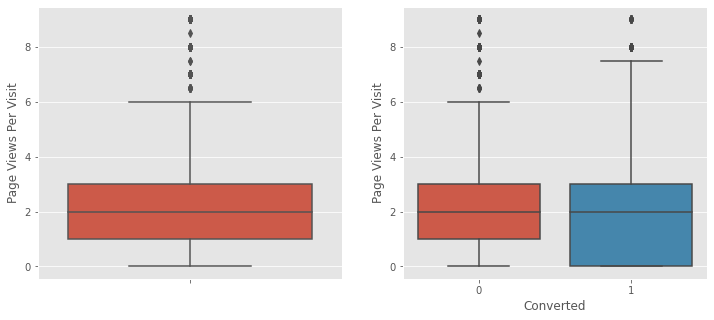

In [500]:
#lets analyse 'Page Views Per Visit' column
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(y=leads['Page Views Per Visit'])

plt.subplot(1,2,2)
sns.boxplot(data=leads, x='Converted', y='Page Views Per Visit')

plt.show()

From the above graph, we can see that outliers have been treated in `Page Views Per Visit` column and median of `Page Views Per Visit` column is same for both converted and non-converted leads.

In [501]:
leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3390
SMS Sent                        2700
Olark Chat Conversation          966
Page Visited on Website          594
Converted to Lead                428
Email Bounced                    310
Email Link Clicked               264
Form Submitted on Website        114
Unreachable                       88
Unsubscribed                      60
Had a Phone Conversation          24
Approached upfront                 5
View in browser link Clicked       4
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [502]:
#Club last activity into others where count is less than 100
leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable', 'Unreachable', 'Had a Phone Conversation', 'View in browser link Clicked', 'Approached upfront', 'Email Received', 'Email Marked Spam', 'Visited Booth in Tradeshow', 'Resubscribed to emails'],'Others')
leads['Last Activity'].value_counts(dropna=False)

Email Opened                 3390
SMS Sent                     2700
Olark Chat Conversation       966
Page Visited on Website       594
Converted to Lead             428
Email Bounced                 310
Email Link Clicked            264
Others                        127
Form Submitted on Website     114
Unsubscribed                   60
Name: Last Activity, dtype: int64

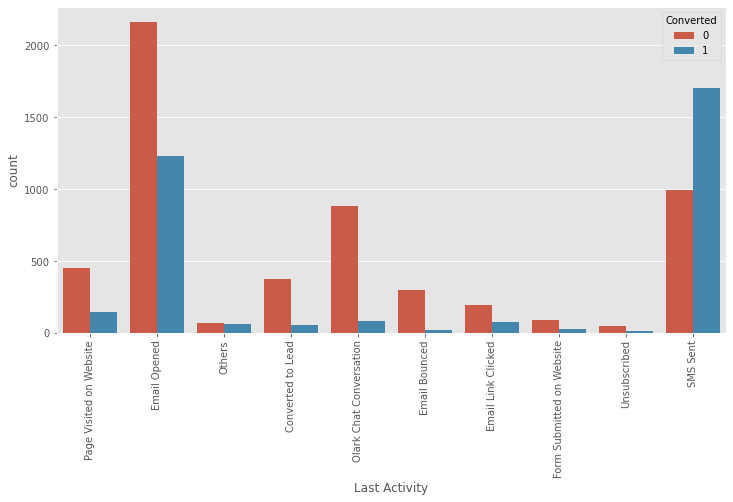

In [503]:
plt.figure(figsize=(12,6))
sns.countplot(leads['Last Activity'], hue=leads['Converted'])
plt.xticks(rotation=90)
plt.show()

From the above graph, we can see that conversion rate is higher where Last Activity is 'SMS Sent'.

Conversion rate need to be increased for 'Email Opened' customers

In [504]:
#lets analyse country column
leads['Country'].value_counts(dropna=False)

India                   6347
NaN                     2323
United States             68
United Arab Emirates      52
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
South Africa               4
Kuwait                     4
Germany                    4
unknown                    4
Nigeria                    4
Canada                     4
Sweden                     3
China                      2
Belgium                    2
Asia/Pacific Region        2
Uganda                     2
Italy                      2
Ghana                      2
Bangladesh                 2
Philippines                2
Liberia                    1
Vietnam                    1
Denmark                    1
Switzerland                1
Russia                     1
Netherlands                1
Malaysia      

In [505]:
#lets replace missing values in Country column with unknown as a new value

leads['Country'] = leads['Country'].replace(np.nan, 'unknown')
leads['Country'].value_counts(dropna=False)

India                   6347
unknown                 2327
United States             68
United Arab Emirates      52
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
South Africa               4
Kuwait                     4
Canada                     4
Germany                    4
Nigeria                    4
Sweden                     3
China                      2
Belgium                    2
Ghana                      2
Asia/Pacific Region        2
Uganda                     2
Italy                      2
Bangladesh                 2
Philippines                2
Liberia                    1
Vietnam                    1
Denmark                    1
Switzerland                1
Tanzania                   1
Netherlands                1
Malaysia                   1
Sri Lanka     

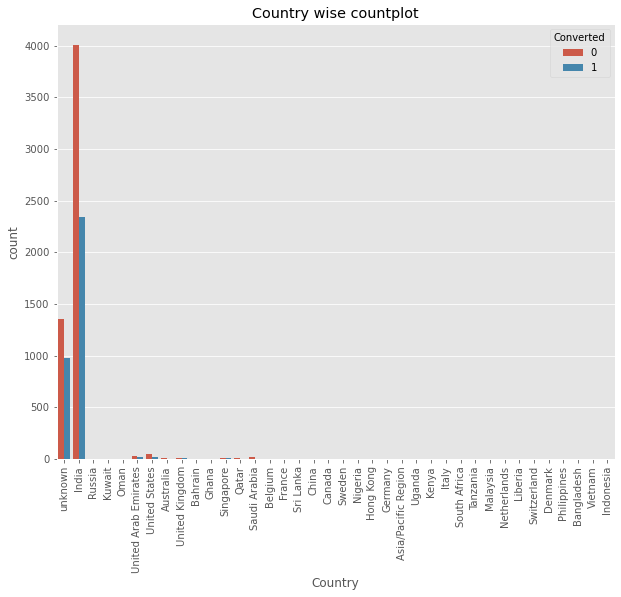

In [506]:
plt.figure(figsize=(10,8))
sns.countplot(leads['Country'], hue=leads['Converted'])
plt.xticks(rotation=90)
plt.title('Country wise countplot')
plt.show()

We can see that most of the rows contain value as India and unknown. this value is not changing for many records, hence it can be dropped

In [507]:
leads.drop('Country',1,inplace=True)

leads.head(2)

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,NaN,...,No,No,No,Ringing,No,No,NaN,No,No,Email Opened


In [508]:
#Lets analyse Specialization column
leads['Specialization'].value_counts(dropna=False)

NaN                                  3284
Finance Management                    945
Human Resource Management             820
Marketing Management                  815
Operations Management                 495
Business Administration               390
IT Projects Management                360
Supply Chain Management               338
Banking, Investment And Insurance     325
Media and Advertising                 197
Travel and Tourism                    189
International Business                171
Healthcare Management                 151
E-COMMERCE                            107
Hospitality Management                107
Retail Management                      95
Rural and Agribusiness                 70
E-Business                             56
Services Excellence                    38
Name: Specialization, dtype: int64

In [509]:
#replace missing values with new category
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Missing')
leads['Specialization'].value_counts(dropna=False)

Missing                              3284
Finance Management                    945
Human Resource Management             820
Marketing Management                  815
Operations Management                 495
Business Administration               390
IT Projects Management                360
Supply Chain Management               338
Banking, Investment And Insurance     325
Media and Advertising                 197
Travel and Tourism                    189
International Business                171
Healthcare Management                 151
E-COMMERCE                            107
Hospitality Management                107
Retail Management                      95
Rural and Agribusiness                 70
E-Business                             56
Services Excellence                    38
Name: Specialization, dtype: int64

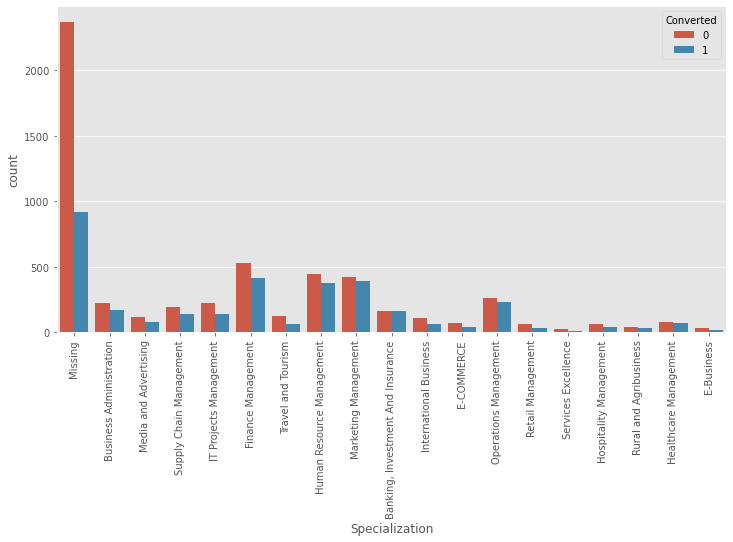

In [510]:
plt.figure(figsize=(12,6))
sns.countplot(leads['Specialization'], hue=leads['Converted'])
plt.xticks(rotation=90)
plt.show()

In [511]:
#From the above graph, we can see that those who have done specialization in management, conversion rate is higher in that case
#So, lets club all management specializations into one category
leads['Specialization'] = leads['Specialization'].replace(['Finance Management', 'Human Resource Management', 'Marketing Management', 'Operations Management', 'IT Projects Management', 'Supply Chain Management', 'Healthcare Management', 'Hospitality Management', 'Retail Management'], 'Management')

leads['Specialization'].value_counts(dropna=False)

Management                           4126
Missing                              3284
Business Administration               390
Banking, Investment And Insurance     325
Media and Advertising                 197
Travel and Tourism                    189
International Business                171
E-COMMERCE                            107
Rural and Agribusiness                 70
E-Business                             56
Services Excellence                    38
Name: Specialization, dtype: int64

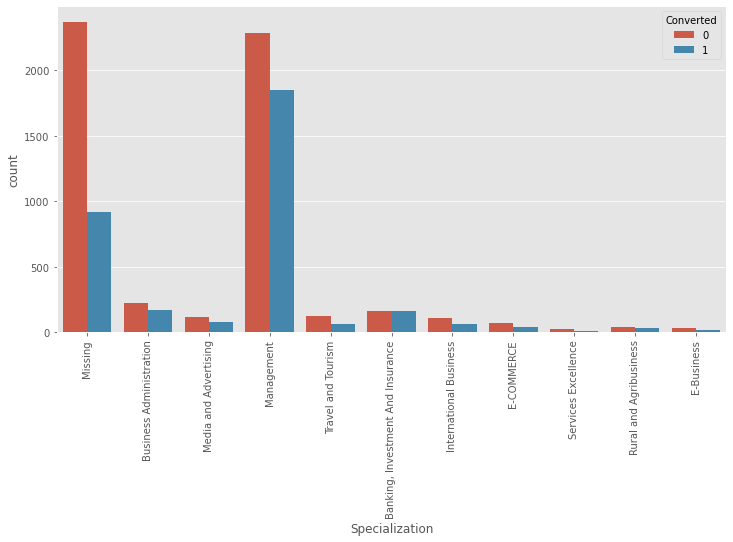

In [512]:
plt.figure(figsize=(12,6))
sns.countplot(leads['Specialization'], hue=leads['Converted'])
plt.xticks(rotation=90)
plt.show()

In [513]:
#lets analyse 'What is your current occupation' column
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5410
NaN                     2643
Working Professional     667
Student                  204
Other                     13
Housewife                  9
Businessman                7
Name: What is your current occupation, dtype: int64

In [514]:
#replace missing values with mode
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan,leads['What is your current occupation'].mode()[0])
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              8053
Working Professional     667
Student                  204
Other                     13
Housewife                  9
Businessman                7
Name: What is your current occupation, dtype: int64

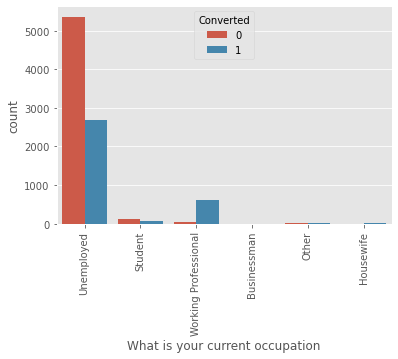

In [515]:
sns.countplot(leads['What is your current occupation'], hue=leads['Converted'])
plt.xticks(rotation=90)
plt.show()

From the above graph, we can see that conversion rate is high for Working Professional.

Company received more leads from Unemployed people in terms of absolute numbers

In [516]:
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6290
NaN                          2661
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

From the above data, we can see that there are many missing values. Moreover, values in this column are not balanced. Almost all rows have `Better Career Prospects` value except missing values. Hence, this column can be dropped.

In [517]:
leads.drop('What matters most to you in choosing a course',1,inplace=True)

In [518]:
#lets analyse Search column
leads['Search'].value_counts(dropna=False)

No     8940
Yes      13
Name: Search, dtype: int64

From the above data, we can conclude that Search is imbalanced column, hence we can drop it

In [519]:
leads.drop('Search',1,inplace=True)

In [520]:
leads['Magazine'].value_counts(dropna=False)

No    8953
Name: Magazine, dtype: int64

`Magazine` column contains value 'No' for all rows, hence this can be dropped

In [521]:
leads.drop('Magazine',1,inplace=True)

In [522]:
leads['Newspaper Article'].value_counts()

No     8952
Yes       1
Name: Newspaper Article, dtype: int64

From the above data, we can see that `Newspaper Article` column is highly imbalanced, hence it can be dropped

In [523]:
leads.drop('Newspaper Article',1,inplace=True)

In [524]:
leads['X Education Forums'].value_counts()

No    8953
Name: X Education Forums, dtype: int64

`X Education Forums` column contain only one value for all rows, hence it can be dropped.

In [525]:
leads.drop('X Education Forums',1,inplace=True)

In [526]:
leads['Newspaper'].value_counts(dropna=False)

No     8952
Yes       1
Name: Newspaper, dtype: int64

From the above data, we can see that `Newspaper` column is highly imbalanced, hence it can be dropped

In [527]:
leads.drop('Newspaper',1,inplace=True)

In [528]:
leads['Digital Advertisement'].value_counts(dropna=False)

No     8950
Yes       3
Name: Digital Advertisement, dtype: int64

From the above data, we can see that `Digital Advertisement` column is highly imbalanced, hence it can be dropped

In [529]:
leads.drop('Digital Advertisement', 1, inplace=True)

In [530]:
#lets analyse Through Recommendations column
leads['Through Recommendations'].value_counts(dropna=False)

No     8947
Yes       6
Name: Through Recommendations, dtype: int64

From the above data, `Through Recommendations` column is highly imbalanced, hence it can be dropped

In [531]:
leads.drop('Through Recommendations', 1, inplace=True)

In [532]:
#lets analyse 'Receive More Updates About Our Courses' column
leads['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    8953
Name: Receive More Updates About Our Courses, dtype: int64

From the above data, `Receive More Updates About Our Courses` column is highly imbalanced, hence it can be dropped

In [533]:
leads.drop('Receive More Updates About Our Courses', 1, inplace=True)

In [534]:
#lets analyse 'Update me on Supply Chain Content' column
leads['Update me on Supply Chain Content'].value_counts(dropna=False)

No    8953
Name: Update me on Supply Chain Content, dtype: int64

from the above data, we can conclude `Update me on Supply Chain Content` column is highly imbalanced, hence it can dropped

In [535]:
leads.drop('Update me on Supply Chain Content', 1, inplace=True)

In [536]:
#lets analyse 'Get updates on DM Content' column
leads['Get updates on DM Content'].value_counts(dropna=False)

No    8953
Name: Get updates on DM Content, dtype: int64

From the above data, we can conclude that `Get updates on DM Content` column is highly imbalanced, hence it can be dropped

In [537]:
leads.drop('Get updates on DM Content', 1, inplace=True)

In [538]:
leads['Tags'].value_counts(dropna=False)

NaN                                                  3284
Will revert after reading the email                  2002
Ringing                                              1162
Interested in other courses                           505
Already a student                                     461
Closed by Horizzon                                    290
switched off                                          237
Busy                                                  183
Lost to EINS                                          169
Not doing further education                           137
Interested  in full time MBA                          116
Graduation in progress                                110
invalid number                                         81
Diploma holder (Not Eligible)                          63
wrong number given                                     46
opp hangup                                             33
number not provided                                    26
in touch with 

In [539]:
leads['Tags'] = leads['Tags'].replace(np.nan, 'Not Specified')

leads['Tags'] = leads['Tags'].replace(['Recognition issue (DEC approval)', 'University not recognized', 'Shall take in the next coming month', 'Lateral student', 'Want to take admission but has financial problems', 'Interested in Next batch', 'In confusion whether part time or DLP', 'Still Thinking', 'Lost to Others', 'in touch with EINS', 'in touch with EINS', 'number not provided', 'opp hangup', 'wrong number given','invalid number', 'Lost to EINS'], 'Others')

leads['Tags'].value_counts(dropna=False)

Not Specified                          3284
Will revert after reading the email    2002
Ringing                                1162
Interested in other courses             505
Already a student                       461
Others                                  403
Closed by Horizzon                      290
switched off                            237
Busy                                    183
Not doing further education             137
Interested  in full time MBA            116
Graduation in progress                  110
Diploma holder (Not Eligible)            63
Name: Tags, dtype: int64

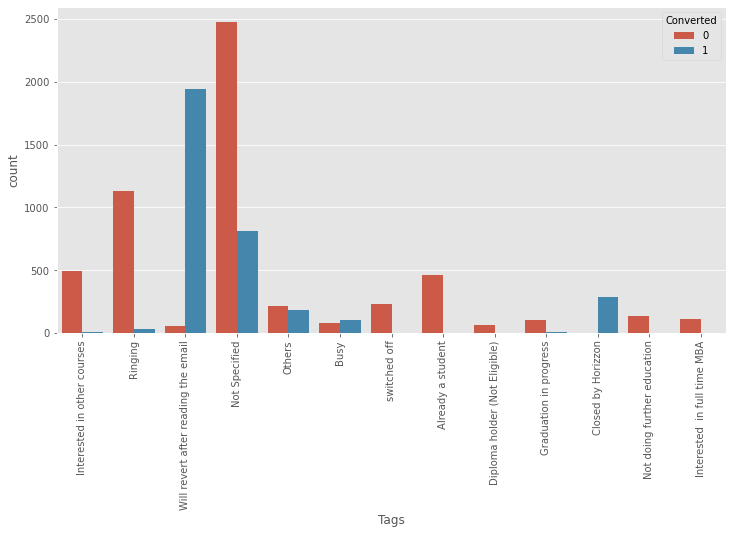

In [540]:
plt.figure(figsize=(12,6))
sns.countplot(leads['Tags'], hue=leads['Converted'])
plt.xticks(rotation=90)
plt.show()

From the above graph, we can see that conversion rate is high for `Will revert after reading the email` and `Closed by Horizzon`tags

Conversion rate is very low for rows having Interested in other courses, Interested  in full time MBA and Ringing tags

In [541]:
#lets start analysing categorical variables

leads['City'].value_counts(dropna=False)

NaN                            3578
Mumbai                         3109
Thane & Outskirts               723
Other Cities                    669
Other Cities of Maharashtra     438
Other Metro Cities              364
Tier II Cities                   72
Name: City, dtype: int64

In [542]:
#lets replace missing values in City column with mode of the column

leads['City'] = leads['City'].replace(np.nan, 'Mumbai')
leads['City'].value_counts(dropna=False)

Mumbai                         6687
Thane & Outskirts               723
Other Cities                    669
Other Cities of Maharashtra     438
Other Metro Cities              364
Tier II Cities                   72
Name: City, dtype: int64

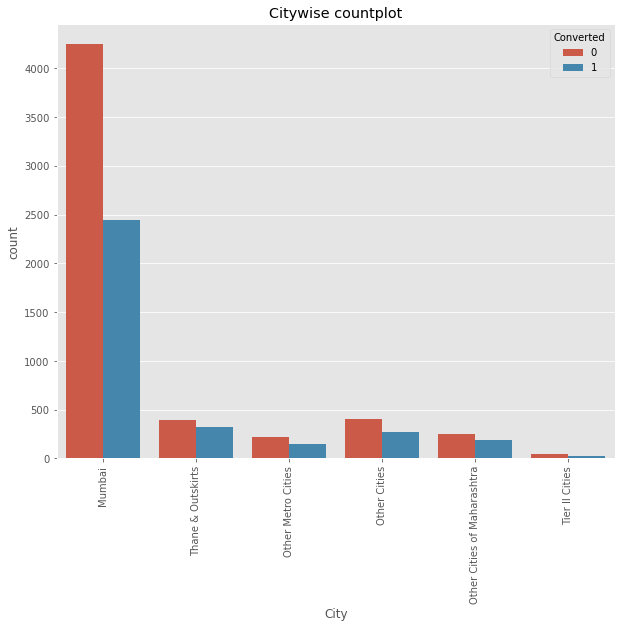

In [543]:
plt.figure(figsize=(10,8))
sns.countplot(leads['City'], hue=leads['Converted'])
plt.xticks(rotation=90)
plt.title('Citywise countplot')
plt.show()

In [544]:
#lets analyse 'I agree to pay the amount through cheque' column
leads['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    8953
Name: I agree to pay the amount through cheque, dtype: int64

From the above data, we can see that `I agree to pay the amount through cheque` is highly imbalanced column, hence it can be dropped

In [545]:
leads.drop('I agree to pay the amount through cheque', 1, inplace=True)

In [546]:
leads['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6155
Yes    2798
Name: A free copy of Mastering The Interview, dtype: int64

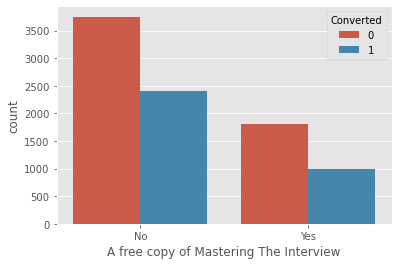

In [547]:
sns.countplot(leads['A free copy of Mastering The Interview'], hue=leads['Converted'])
plt.show()

`A free copy of Mastering The Interview` shows almost similar trend for converted and non-converted customers, hence can't  conclude anything from the above graph

In [548]:
#lets analyse 'Last Notable Activity' column
leads['Last Notable Activity'].value_counts(dropna=False)

Modified                        3224
Email Opened                    2789
SMS Sent                        2143
Page Visited on Website          288
Olark Chat Conversation          182
Email Link Clicked               170
Email Bounced                     59
Unsubscribed                      46
Unreachable                       32
Had a Phone Conversation          13
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [549]:
#lets club low frequency categories into others

leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Unreachable', 'Had a Phone Conversation', 'Email Marked Spam', 'Email Marked Spam', 'Approached upfront', 'Resubscribed to emails', 'View in browser link Clicked', 'Form Submitted on Website', 'Email Received'], 'Others')

leads['Last Notable Activity'].value_counts(dropna=False)

Modified                   3224
Email Opened               2789
SMS Sent                   2143
Page Visited on Website     288
Olark Chat Conversation     182
Email Link Clicked          170
Email Bounced                59
Others                       52
Unsubscribed                 46
Name: Last Notable Activity, dtype: int64

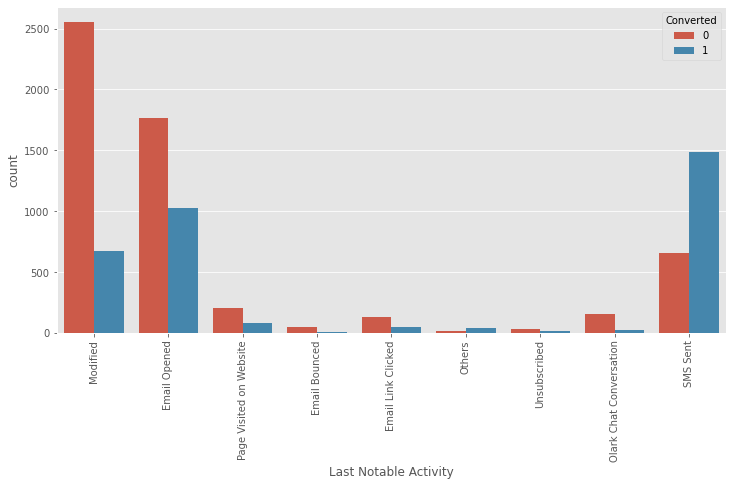

In [550]:
plt.figure(figsize=(12,6))
sns.countplot(leads['Last Notable Activity'], hue=leads['Converted'])
plt.xticks(rotation=90)
plt.show()

From the above graph, we can see that conversion rate is high where Last notable activity is 'SMS Sent' and it is low where activity is 'Modified', 'Olark Chat Conersation' or 'Email Opened'.

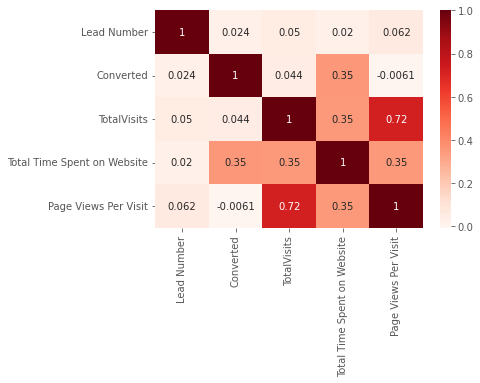

In [551]:
#lets analyse correlation using heatmap
sns.heatmap(leads.corr(), annot=True, cmap='Reds')
plt.show()

From the above heatmap, we can see that `Page Views Per Visit` is highly correlated with `TotalVisits`

In [552]:
#check missing values
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             8953 non-null   int64  
 1   Lead Origin                             8953 non-null   object 
 2   Lead Source                             8953 non-null   object 
 3   Do Not Email                            8953 non-null   object 
 4   Converted                               8953 non-null   int64  
 5   TotalVisits                             8953 non-null   float64
 6   Total Time Spent on Website             8953 non-null   int64  
 7   Page Views Per Visit                    8953 non-null   float64
 8   Last Activity                           8953 non-null   object 
 9   Specialization                          8953 non-null   object 
 10  What is your current occupation         8953 non-null   obje

### Dummy variable creation

In [553]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Missing,Unemployed,Interested in other courses,Mumbai,No,Modified
1,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Missing,Unemployed,Ringing,Mumbai,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Missing,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [554]:
binary_vars = ['Do Not Email', 'A free copy of Mastering The Interview']

def binary_transform(x):
    return x.map({'Yes':1, 'No':0})

leads[binary_vars] = leads[binary_vars].apply(binary_transform)

leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Missing,Unemployed,Interested in other courses,Mumbai,0,Modified
1,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Missing,Unemployed,Ringing,Mumbai,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Missing,Unemployed,Will revert after reading the email,Mumbai,0,Modified


In [555]:
#Creating dummy variables for 'Lead Origin' feature
df = pd.get_dummies(leads[['Lead Origin']], drop_first=True)

leads = pd.concat([leads, df], 1)

leads.drop(['Lead Origin'], axis=1, inplace=True)

In [556]:
leads['Lead Source'].value_counts()

Google              2841
Direct Traffic      2499
Olark Chat          1751
Organic Search      1092
Reference            442
Welingak Website     129
Referral Sites       117
Others                49
Facebook              33
Name: Lead Source, dtype: int64

In [557]:
#Creating dummy variables for 'Lead Source' feature
df = pd.get_dummies(leads['Lead Source'], prefix='Lead Source')

df.drop('Lead Source_Others', 1, inplace=True)

leads = pd.concat([leads, df], axis=1)

leads.drop(['Lead Source'], axis=1, inplace=True)

In [558]:
leads['Specialization'].value_counts()

Management                           4126
Missing                              3284
Business Administration               390
Banking, Investment And Insurance     325
Media and Advertising                 197
Travel and Tourism                    189
International Business                171
E-COMMERCE                            107
Rural and Agribusiness                 70
E-Business                             56
Services Excellence                    38
Name: Specialization, dtype: int64

In [559]:
##Creating dummy variables for 'Specialization' feature
df = pd.get_dummies(leads['Specialization'], prefix='Specialization')

df.drop('Specialization_Missing', 1, inplace=True)

leads = pd.concat([leads, df], axis=1)

leads.drop(['Specialization'], axis=1, inplace=True)

In [560]:
leads['What is your current occupation'].value_counts()

Unemployed              8053
Working Professional     667
Student                  204
Other                     13
Housewife                  9
Businessman                7
Name: What is your current occupation, dtype: int64

In [561]:
###Creating dummy variables for 'What is your current occupation' feature
df = pd.get_dummies(leads['What is your current occupation'], prefix='Occupation')

df.drop('Occupation_Other',1,inplace=True)

leads = pd.concat([leads, df], 1)

leads.drop('What is your current occupation', 1, inplace=True)

In [562]:
leads.City.value_counts()

Mumbai                         6687
Thane & Outskirts               723
Other Cities                    669
Other Cities of Maharashtra     438
Other Metro Cities              364
Tier II Cities                   72
Name: City, dtype: int64

In [563]:
##Creating dummy variables for 'City' feature
df = pd.get_dummies(leads['City'], prefix='City')

df.drop('City_Other Cities',1,inplace=True)

leads = pd.concat([leads, df], 1)

leads.drop('City', 1, inplace=True)

In [564]:
#Creating dummy variable for 'Last Activity' feature
df = pd.get_dummies(leads['Last Activity'], prefix='Last Activity')

df.drop('Last Activity_Others',1,inplace=True)

leads = pd.concat([leads, df], 1)

leads.drop('Last Activity', 1, inplace=True)

In [565]:
#Creating dummy variable for 'Tags' feature
df = pd.get_dummies(leads['Tags'], prefix='Tags')

df.drop('Tags_Not Specified',1,inplace=True)

leads = pd.concat([leads, df], 1)

leads.drop('Tags', 1, inplace=True)

In [566]:
#Creating dummy variable for 'Last Notable Activity' feature
df = pd.get_dummies(leads['Last Notable Activity'], prefix='Last Notable Activity')

df.drop('Last Notable Activity_Others',1,inplace=True)

leads = pd.concat([leads, df], 1)

leads.drop('Last Notable Activity', 1, inplace=True)

In [567]:
cat_cols= leads.select_dtypes(include=['object']).columns
cat_cols

Index([], dtype='object')

We can see that there are no more categorical columns present in the dataframe

### Split the test-train data

In [568]:
#Creating X and y variables for modelling
from sklearn.model_selection import train_test_split

y = leads['Converted']

X = leads.drop('Converted', 1)

In [569]:
X.head()

,Lead Number,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed
0,660737,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,660727,0,2.0,1532,2.0,1,1,0,0,1,...,1,0,0,0,1,0,0,0,0,0
3,660719,0,1.0,305,1.0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,660681,0,2.0,1428,1.0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [570]:
X.shape

(8953, 66)

In [571]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.7, stratify=y)

In [572]:
final_train_leads = X_train['Lead Number']
final_test_leads = X_test['Lead Number']

X_train.drop('Lead Number', 1, inplace=True)
X_test.drop('Lead Number', 1, inplace=True)

In [573]:
X_train.shape

(6267, 65)

In [574]:
X_test.shape

(2686, 65)

In [575]:
y.value_counts()

0    5558
1    3395
Name: Converted, dtype: int64

In [576]:
y_train.value_counts()

0    3891
1    2376
Name: Converted, dtype: int64

In [577]:
y_test.value_counts()

0    1667
1    1019
Name: Converted, dtype: int64

### Scaling

In [578]:
#Scaling the variables using StandardScaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed
1372,0,0.635767,1.356436,1.459702,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1007,0,0.292170,2.368645,0.927570,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1397,0,-1.082219,-0.872636,-1.200957,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7111,0,-0.395024,-0.706700,-0.136693,1,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2535,0,0.979364,-0.675356,0.395438,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### Feature selection using RFE and model building

In [579]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [580]:
#select top 15 features using RFE
from sklearn.feature_selection import RFE

rfe = RFE(lr, 15)

rfe = rfe.fit(X_train, y_train)

In [581]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 35),
 ('Total Time Spent on Website', False, 6),
 ('Page Views Per Visit', False, 34),
 ('A free copy of Mastering The Interview', False, 51),
 ('Lead Origin_Landing Page Submission', False, 19),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 27),
 ('Lead Source_Direct Traffic', False, 3),
 ('Lead Source_Facebook', False, 26),
 ('Lead Source_Google', False, 5),
 ('Lead Source_Olark Chat', False, 22),
 ('Lead Source_Organic Search', False, 4),
 ('Lead Source_Reference', False, 18),
 ('Lead Source_Referral Sites', False, 2),
 ('Lead Source_Welingak Website', True, 1),
 ('Specialization_Banking, Investment And Insurance', False, 30),
 ('Specialization_Business Administration', False, 45),
 ('Specialization_E-Business', False, 38),
 ('Specialization_E-COMMERCE', False, 25),
 ('Specialization_International Business', False, 21),
 ('Specialization_Management', False, 46),
 ('Specialization_Media and Advertising

In [582]:
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Occupation_Working Professional',
       'Last Activity_Olark Chat Conversation', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligible)',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

### Assessing the model with StatsModels

In [583]:
import statsmodels.api as sm

In [584]:
#create logistic regression model using StatsModels
X_train_sm = sm.add_constant(X_train[cols])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1612.0
Date:                Mon, 09 May 2022   Deviance:                       3224.0
Time:                        09:47:17   Pearson chi2:                 7.58e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.3036      0.059    -22.078      0.000      -1.419      -1.188
Do Not Email                                -1.3068      0.201     -6.490      0.000      -1.701      -0.912
Lead Origin_Lead Add Form                    1.1717      0.361      3.250      0.001       0.465       1.878
Lead Source_Welingak Website                 3.8942      1.077      3.616      0.000       1.784       6.005
Occupation_Working Professional              1.4359      0.357      4.022      0.000       0.736       2.136
Last Activity_Olark Chat Conversation       -1.4267      0.189     -7.531      0.000      -1.798      -1.055
Tags_Already a student                      -4.2956      1.004     -4.279      0.000      -6.263      -2.328
Tags_Closed by Horizzon                      6.1336      1.008      6.085      0.000       4.158       8.109
Tags_Diploma holder (Not Eligible)          -2.6022      1.022     -2.547      0.011      -4.605      -0.599
Tags_Interested  in full time MBA           -2.2215      0.724     -3.070      0.002      -3.640      -0.803
Tags_Interested in other courses            -2.4941      0.394     -6.333      0.000      -3.266      -1.722
Tags_Not doing further education            -3.0483      1.012     -3.012      0.003      -5.032      -1.064
Tags_Ringing                                -3.4242      0.231    -14.807      0.000      -3.877      -2.971
Tags_Will revert after reading the email     3.9917      0.167     23.833      0.000       3.663       4.320
Tags_switched off                           -3.8901      0.595     -6.541      0.000      -5.056      -2.724
Last Notable Activity_SMS Sent               2.1703      0.113     19.200      0.000       1.949       2.392
============================================================================================================
"""

`Tags_Diploma holder (Not Eligible)` feature has higher p-value, hence we will drop this.

In [585]:
cols = cols.drop('Tags_Diploma holder (Not Eligible)', 1)


X_train_sm = sm.add_constant(X_train[cols])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1619.8
Date:                Mon, 09 May 2022   Deviance:                       3239.5
Time:                        09:47:17   Pearson chi2:                 7.63e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.3295      0.059    -22.596      0.000      -1.445      -1.214
Do Not Email                                -1.3069      0.202     -6.483      0.000      -1.702      -0.912
Lead Origin_Lead Add Form                    1.1988      0.360      3.330      0.001       0.493       1.904
Lead Source_Welingak Website                 3.8897      1.077      3.613      0.000       1.779       6.000
Occupation_Working Professional              1.2879      0.340      3.792      0.000       0.622       1.954
Last Activity_Olark Chat Conversation       -1.4116      0.189     -7.451      0.000      -1.783      -1.040
Tags_Already a student                      -4.2621      1.004     -4.247      0.000      -6.229      -2.295
Tags_Closed by Horizzon                      6.1646      1.008      6.117      0.000       4.189       8.140
Tags_Interested  in full time MBA           -2.1797      0.723     -3.017      0.003      -3.596      -0.764
Tags_Interested in other courses            -2.4513      0.392     -6.245      0.000      -3.221      -1.682
Tags_Not doing further education            -3.0251      1.012     -2.988      0.003      -5.009      -1.041
Tags_Ringing                                -3.4129      0.231    -14.753      0.000      -3.866      -2.959
Tags_Will revert after reading the email     4.0249      0.168     24.020      0.000       3.696       4.353
Tags_switched off                           -3.8813      0.595     -6.525      0.000      -5.047      -2.715
Last Notable Activity_SMS Sent               2.1907      0.113     19.406      0.000       1.969       2.412
============================================================================================================
"""

### Checking VIF's

In [586]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [587]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Tags_Will revert after reading the email,1.64
1,Lead Origin_Lead Add Form,1.62
13,Last Notable Activity_SMS Sent,1.46
3,Occupation_Working Professional,1.34
2,Lead Source_Welingak Website,1.33
6,Tags_Closed by Horizzon,1.16
10,Tags_Ringing,1.08
0,Do Not Email,1.07
4,Last Activity_Olark Chat Conversation,1.06
5,Tags_Already a student,1.03


There is no high correlation between two variables, hence we will keep  above variables and evaluate the model

In [588]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.20923518, 0.99250523, 0.97722239, 0.20923518, 0.20923518,
       0.70289652, 0.00371501, 0.07230978, 0.20923518, 0.06683047])

In [589]:
df = pd.DataFrame({'Converted_Actual':y_train, 'Converted_Pred':y_train_pred})
df['Lead Number'] = final_train_leads
df['Predicted'] = df['Converted_Pred'].map(lambda x: 1 if x > 0.5 else 0)
df

,Converted_Actual,Converted_Pred,Lead Number,Predicted
1372,0,0.209235,645517,0
1007,1,0.992505,649404,1
1397,1,0.977222,645352,1
7111,0,0.209235,594938,0
2535,0,0.209235,635337,0
...,...,...,...,...
756,0,0.209235,652616,0
9076,1,0.981716,580775,1
6689,0,0.008642,598507,0
4162,0,0.209235,620055,0


### Model evaluation on the train data

In [590]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

In [591]:

print("Accuracy: ", accuracy_score(df['Converted_Actual'], df['Predicted']))
print("Sensitivity/Recall: ", recall_score(df['Converted_Actual'], df['Predicted']))
print("Precision: ", precision_score(df['Converted_Actual'], df['Predicted']))
print("F1-Score: ", f1_score(df['Converted_Actual'], df['Predicted']))
print("ROC AUC Score: ", roc_auc_score(df['Converted_Actual'], df['Predicted']))

Accuracy:  0.9028243178554333
Sensitivity/Recall:  0.8148148148148148
Precision:  0.9197149643705463
F1-Score:  0.8640928364204419
ROC AUC Score:  0.8856906250892373


In [592]:
confusion = metrics.confusion_matrix(df['Converted_Actual'], df['Predicted'])
confusion

array([[3722,  169],
       [ 440, 1936]], dtype=int64)

In [593]:
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]
TP = confusion[1,1]

In [594]:
#sensitivity
TP / float(TP+FN)

0.8148148148148148

In [595]:
#specificity
TN / float(TN+FP)

0.9565664353636597

In [596]:
#Precision
print (TP / float(TP+FP))

0.9197149643705463


### Plotting the ROC curve

In [597]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

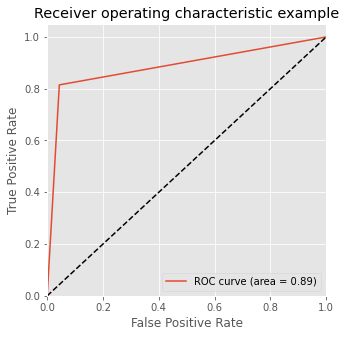

In [598]:
draw_roc(df['Converted_Actual'], df['Predicted'])

### Finding optimal cutoff point

In [599]:
nums = [float(i/10) for i in range(10)]

for i in nums:
    df[i] = df['Converted_Pred'].map(lambda x: 1 if x>i else 0)

df.head()

,Converted_Actual,Converted_Pred,Lead Number,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1372,0,0.209235,645517,0,1,1,1,0,0,0,0,0,0,0
1007,1,0.992505,649404,1,1,1,1,1,1,1,1,1,1,1
1397,1,0.977222,645352,1,1,1,1,1,1,1,1,1,1,1
7111,0,0.209235,594938,0,1,1,1,0,0,0,0,0,0,0
2535,0,0.209235,635337,0,1,1,1,0,0,0,0,0,0,0


In [600]:
#lets calculate accuracy, sensitivity, specificity for various cutoffs

cutoff_df = pd.DataFrame(columns=['Prob', 'Accuracy', 'Sensitivity', 'Specificity'])

for i in nums:
    c = metrics.confusion_matrix(df['Converted_Actual'], df[i])
    accuracy = accuracy_score(df['Converted_Actual'], df[i])
    sensitivity = recall_score(df['Converted_Actual'], df[i])
    specificity = c[0,0]/(c[0,0]+c[0,1])
    cutoff_df.loc[i] = [i, accuracy, sensitivity, specificity]
    
cutoff_df

,Prob,Accuracy,Sensitivity,Specificity
0.0,0.0,0.379129,1.000000,0.000000
0.1,0.1,0.749960,0.969697,0.615780
0.2,0.2,0.749960,0.968855,0.616294
0.3,0.3,0.902984,0.825337,0.950398
0.4,0.4,0.903622,0.820286,0.954510
0.5,0.5,0.902824,0.814815,0.956566
0.6,0.6,0.902824,0.814815,0.956566
0.7,0.7,0.902186,0.813131,0.956566
0.8,0.8,0.872826,0.683081,0.988692
0.9,0.9,0.870592,0.675926,0.989463


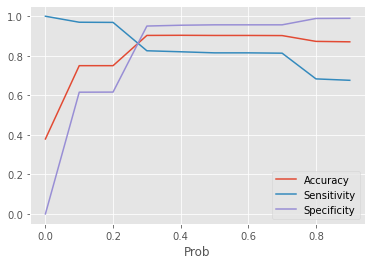

In [601]:
#plot accuracy, sensitivity and specificity for various cutoffs
plt.style.use('ggplot')
cutoff_df.plot(x='Prob',y=['Accuracy', 'Sensitivity', 'Specificity'])
plt.show()

From the above graph, we can take 0.3 as the optimum cutoff

In [602]:
df['Predicted'] = df['Converted_Pred'].map(lambda x: 1 if x > 0.3 else 0)
df

,Converted_Actual,Converted_Pred,Lead Number,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1372,0,0.209235,645517,0,1,1,1,0,0,0,0,0,0,0
1007,1,0.992505,649404,1,1,1,1,1,1,1,1,1,1,1
1397,1,0.977222,645352,1,1,1,1,1,1,1,1,1,1,1
7111,0,0.209235,594938,0,1,1,1,0,0,0,0,0,0,0
2535,0,0.209235,635337,0,1,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,0,0.209235,652616,0,1,1,1,0,0,0,0,0,0,0
9076,1,0.981716,580775,1,1,1,1,1,1,1,1,1,1,1
6689,0,0.008642,598507,0,1,0,0,0,0,0,0,0,0,0
4162,0,0.209235,620055,0,1,1,1,0,0,0,0,0,0,0


In [603]:

print("Accuracy: ", accuracy_score(df['Converted_Actual'], df['Predicted']))
print("Sensitivity/Recall: ", recall_score(df['Converted_Actual'], df['Predicted']))
print("Precision: ", precision_score(df['Converted_Actual'], df['Predicted']))
print("F1-Score: ", f1_score(df['Converted_Actual'], df['Predicted']))
print("ROC AUC Score: ", roc_auc_score(df['Converted_Actual'], df['Predicted']))

Accuracy:  0.9029838838359662
Sensitivity/Recall:  0.8253367003367004
Precision:  0.9103992571959145
F1-Score:  0.865783664459161
ROC AUC Score:  0.8878675277576588


In [604]:
for i in nums:
    df.drop(i, 1, inplace=True)

df

,Converted_Actual,Converted_Pred,Lead Number,Predicted
1372,0,0.209235,645517,0
1007,1,0.992505,649404,1
1397,1,0.977222,645352,1
7111,0,0.209235,594938,0
2535,0,0.209235,635337,0
...,...,...,...,...
756,0,0.209235,652616,0
9076,1,0.981716,580775,1
6689,0,0.008642,598507,0
4162,0,0.209235,620055,0


In [605]:
#Adding column for Lead Score
df['Lead Score'] = round(df['Converted_Pred'],2)*100
df

,Converted_Actual,Converted_Pred,Lead Number,Predicted,Lead Score
1372,0,0.209235,645517,0,21.0
1007,1,0.992505,649404,1,99.0
1397,1,0.977222,645352,1,98.0
7111,0,0.209235,594938,0,21.0
2535,0,0.209235,635337,0,21.0
...,...,...,...,...,...
756,0,0.209235,652616,0,21.0
9076,1,0.981716,580775,1,98.0
6689,0,0.008642,598507,0,1.0
4162,0,0.209235,620055,0,21.0


In [606]:
confusion = metrics.confusion_matrix(df['Converted_Actual'], df['Predicted'])

specificity = confusion[0,0]/(confusion[0,0]+confusion[0,1])

specificity

0.9503983551786174

In [607]:
confusion

array([[3698,  193],
       [ 415, 1961]], dtype=int64)

From the above data, we can see that model is performing well.
- Accuracy = 90.29%
- Sensitivity/Recall = 82.53%
- Specificity = 95.03%
- Precision = 91.03%
- F1-Score = 86.57%
- ROC AUC Score = 0.8878


### Scaling Test Data

In [608]:
X_test[num_cols] = scaler.transform(X_test[num_cols])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed
9149,0,-0.051427,-0.785980,0.395438,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4123,0,0.979364,2.468207,-0.136693,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1725,0,-0.395024,-0.732512,-0.136693,1,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3194,0,-1.082219,-0.872636,-1.200957,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
6161,0,-0.051427,-0.706700,0.395438,1,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [609]:
X_test_sm = sm.add_constant(X_test[cols])
y_test_pred = res.predict(X_test_sm)
y_test_pred

9149    0.936752
4123    0.997609
1725    0.209235
3194    0.980046
6161    0.008642
          ...   
1533    0.209235
3817    0.997921
7980    0.209235
8588    0.936752
8811    0.209235
Length: 2686, dtype: float64

In [610]:
df_test = pd.DataFrame()
df_test['Converted_Pred'] = y_test_pred
df_test['Converted_Actual'] = y_test
df_test['Lead Number'] = final_test_leads
df_test['Predicted'] = df_test['Converted_Pred'].map(lambda x: 1 if x > 0.3 else 0)
df_test

,Converted_Pred,Converted_Actual,Lead Number,Predicted
9149,0.936752,1,580303,1
4123,0.997609,1,620454,1
1725,0.209235,0,642574,0
3194,0.980046,1,629447,1
6161,0.008642,0,602520,0
...,...,...,...,...
1533,0.209235,0,644117,0
3817,0.997921,1,623471,1
7980,0.209235,0,588664,0
8588,0.936752,0,584237,1


In [611]:
#accuracy
metrics.accuracy_score(df_test['Converted_Actual'], df_test['Predicted'])

0.9054355919583023

In [612]:
#recall/sensitivity
metrics.recall_score(df_test['Converted_Actual'], df_test['Predicted'])

0.8351324828263003

In [613]:
#precision
metrics.precision_score(df_test['Converted_Actual'], df_test['Predicted'])

0.9082177161152615

In [614]:
#F1-score
metrics.f1_score(df_test['Converted_Actual'], df_test['Predicted'])

0.8701431492842535

In [615]:
#Area under ROC curve
metrics.roc_auc_score(df_test['Converted_Actual'], df_test['Predicted'])

0.8917714003813565

In [616]:
#specificity
c = metrics.confusion_matrix(df_test['Converted_Actual'], df_test['Predicted'])

specificity = c[0,0]/(c[0,0] + c[0,1])

specificity

0.9484103179364127

In [617]:
c

array([[1581,   86],
       [ 168,  851]], dtype=int64)

### Train Data
- Accuracy = 90.29%
- Sensitivity/Recall = 82.53%
- Specificity = 95.03%
- Precision = 91.03%
- F1-Score = 86.57%
- ROC AUC Score = 88.78%

### Test Data
- Accuracy = 90.54%
- Sensitivity/Recall = 83.51%
- Specificity = 94.84%
- Precision = 90.82%
- F1-Score = 87.01%
- ROC AUC Score = 0.8917

